In [1]:
# importing these libraries to manipulate the data 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# read the csv file 
data = pd.read_csv('customer_booking.csv', encoding='latin1')
data.head(5) 

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
#1A. DATA QUALITY CHECKS 
# TODO: DO A VISUALISATION TOO 
missing_values = data.isnull().sum() 
print("Missing Values: /n", missing_values)

Missing Values: /n num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


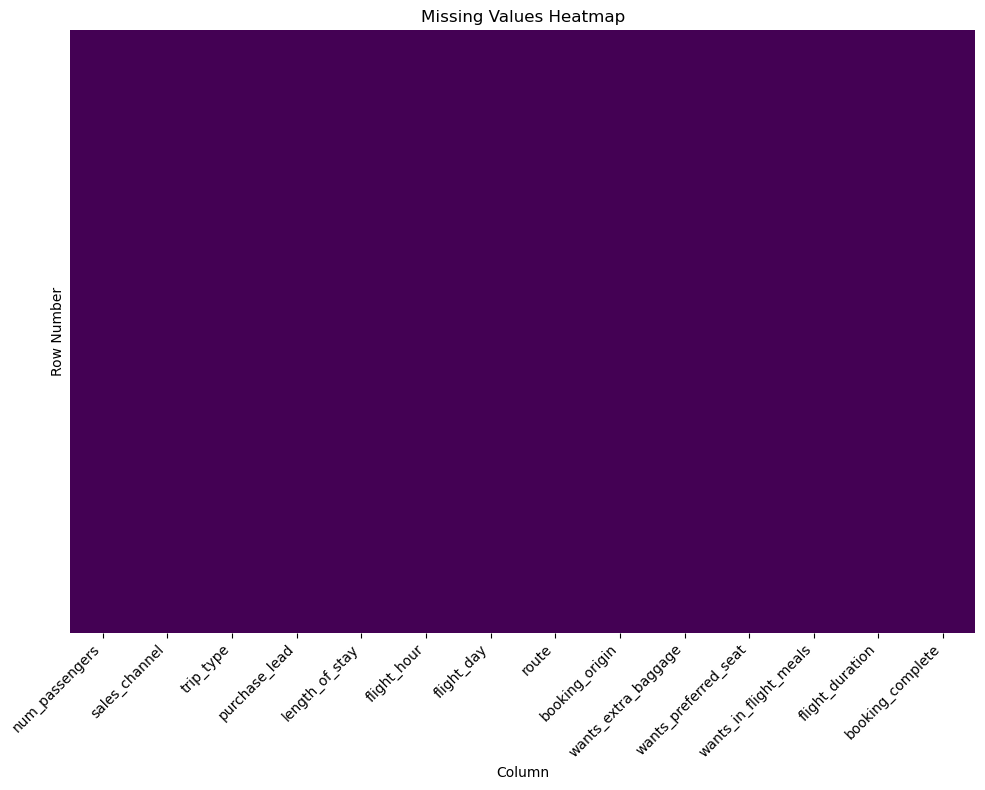

In [4]:
# Create a heatmap of missing values
plt.figure(figsize=(10, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Set plot title and labels
plt.title("Missing Values Heatmap")
plt.xlabel("Column")
plt.ylabel("Row Number")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Display the plot
plt.show()


In [5]:
#2A.Duplicate records 

#  Group by the specified columns and count the records
grouped_df = data.groupby([
    'num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay',
    'flight_hour', 'flight_day', 'route', 'booking_origin', 'wants_extra_baggage',
    'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete'
]).size().reset_index(name='record_count')

# Filter the groups having record_count > 1
filtered_df = grouped_df[grouped_df['record_count'] > 1]

# Sort the result by record_count in descending order
sorted_df = filtered_df.sort_values(by='record_count', ascending=False)
sorted_df = pd.DataFrame(sorted_df)
sorted_df.head() 

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,record_count
46183,3,Mobile,RoundTrip,37,18,4,Tue,HNDTRZ,Japan,1,0,0,7.57,0,11
30599,1,Mobile,RoundTrip,199,6,18,Mon,IKASZX,China,0,0,0,8.15,0,9
42588,2,Mobile,RoundTrip,29,6,6,Thu,DPSPVG,China,1,1,1,5.33,0,8
30142,1,Mobile,RoundTrip,98,36,13,Mon,DMKSYD,Australia,1,1,1,8.58,0,8
46281,3,Mobile,RoundTrip,93,5,0,Sun,DPSPVG,(not set),0,0,1,5.33,0,7


In [6]:
# DESCRIPTIVE ANALYTICS 

In [7]:
#1B. DAILY BOOKING TRENDS (Medium) QUESTION 1 

# Group by 'flight_day' and count the number of bookings
flight_day_bookings = data.groupby('flight_day').size().reset_index(name='num_bookings')

# Display the grouped data
flight_day_bookings = pd.DataFrame(flight_day_bookings)
flight_day_bookings.head() 


,flight_day,num_bookings
0,Fri,6761
1,Mon,8102
2,Sat,5812
3,Sun,6554
4,Thu,7424


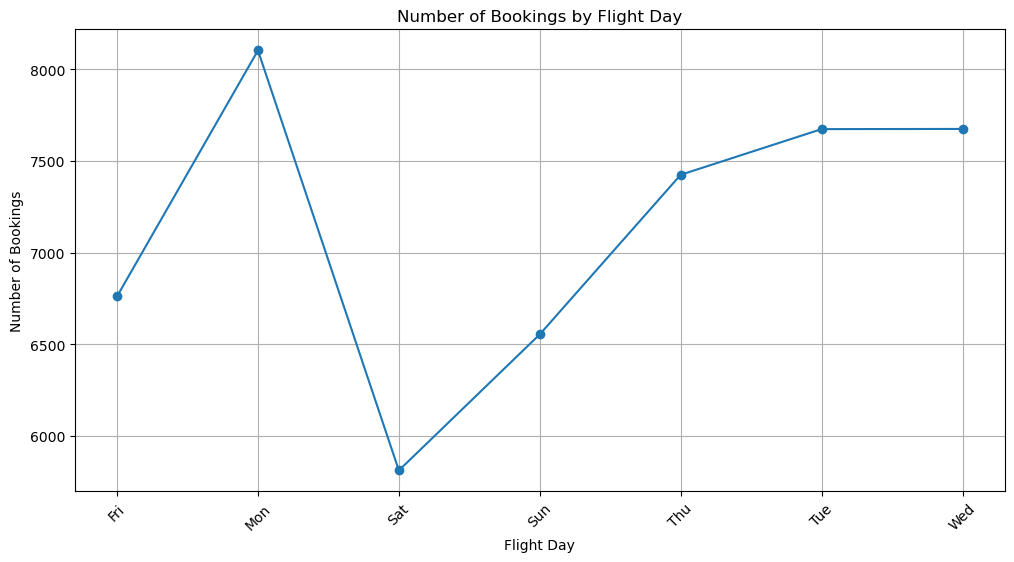

In [8]:
# VISUALISE (Medium) QUESTION 1 
# Sort by 'flight_day' if necessary (assuming flight_day is a string, for example, day of the week)
flight_day_bookings = flight_day_bookings.sort_values(by='flight_day')

# Plot the booking trends by flight day
plt.figure(figsize=(12, 6))
plt.plot(flight_day_bookings['flight_day'], flight_day_bookings['num_bookings'], marker='o', linestyle='-')
plt.title('Number of Bookings by Flight Day')
plt.xlabel('Flight Day')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [9]:
# 2B. SALES CHANNEL PERFORMANCE 
# Group by 'sales_channel' and calculate the number of bookings and completed bookings
sales_channel_bookings = data.groupby('sales_channel').agg(
    num_bookings=('sales_channel', 'size'),
    completed_bookings=('booking_complete', 'sum')
).reset_index()

# Sort the results by number of bookings in descending order
sales_channel_bookings = sales_channel_bookings.sort_values(by='num_bookings', ascending=False)

# Display the results
sales_channel_bookings = pd.DataFrame(sales_channel_bookings)
sales_channel_bookings.head() 


,sales_channel,num_bookings,completed_bookings
0,Internet,44382,6869
1,Mobile,5618,609


In [10]:

# 3B. NUMBER OF BOOKINGS AND COMPLETED BOOKINGS RATE 

# Calculate total number of bookings
total_bookings_count = len(data)

# Group by 'sales_channel' and calculate the required aggregations
sales_channel_bookings = data.groupby('sales_channel').agg(
    total_bookings=('sales_channel', 'size'),
    completed_bookings=('booking_complete', 'sum')
).reset_index()

# Calculate booking rate and completed booking rate
sales_channel_bookings['booking_rate'] = round((sales_channel_bookings['total_bookings'] / total_bookings_count) * 100, 2)
sales_channel_bookings['completed_booking_rate'] = round((sales_channel_bookings['completed_bookings'] / sales_channel_bookings['total_bookings']) * 100, 2)

# Sort the results by total number of bookings in descending order
sales_channel_bookings = sales_channel_bookings.sort_values(by='total_bookings', ascending=False)

# Display the results
sales_channel_bookings = pd.DataFrame(sales_channel_bookings)
sales_channel_bookings.head() 


,sales_channel,total_bookings,completed_bookings,booking_rate,completed_booking_rate
0,Internet,44382,6869,88.76,15.48
1,Mobile,5618,609,11.24,10.84


In [11]:
#4B. CUSTOMER PERFERENCE ANALYSIS 
# Calculate total number of bookings
total_bookings = len(data)

# Calculate the required aggregations
extra_baggage = data['wants_extra_baggage'].sum()
extra_baggage_rate = round((extra_baggage / total_bookings) * 100, 2)

preferred_seat = data['wants_preferred_seat'].sum()
preferred_seat_rate = round((preferred_seat / total_bookings) * 100, 2)

in_flight_meals = data['wants_in_flight_meals'].sum()
in_flight_meals_rate = round((in_flight_meals / total_bookings) * 100, 2)

avg_flight_duration = data['flight_duration'].mean()

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'total_bookings': [total_bookings],
    'extra_baggage': [extra_baggage],
    'extra_baggage_rate': [extra_baggage_rate],
    'preferred_seat': [preferred_seat],
    'preferred_seat_rate': [preferred_seat_rate],
    'in_flight_meals': [in_flight_meals],
    'in_flight_meals_rate': [in_flight_meals_rate],
    'avg_flight_duration': [avg_flight_duration]
})

# Display the results
summary_df = pd.DataFrame(summary_df)
summary_df.head() 

,total_bookings,extra_baggage,extra_baggage_rate,preferred_seat,preferred_seat_rate,in_flight_meals,in_flight_meals_rate,avg_flight_duration
0,50000,33439,66.88,14848,29.7,21357,42.71,7.277561


In [12]:
# 5B. TRIP TYPE ANALYSIS 

# Group by 'trip_type' and calculate the number of bookings
trip_type_bookings = data.groupby('trip_type').size().reset_index(name='num_bookings')

# Sort the results by number of bookings in descending order
trip_type_bookings = trip_type_bookings.sort_values(by='num_bookings', ascending=False)

# Display the results
summary_df = pd.DataFrame(trip_type_bookings)
summary_df.head() 



,trip_type,num_bookings
2,RoundTrip,49497
1,OneWay,387
0,CircleTrip,116


In [13]:
#6b. LEAD TIME ANALYSIS 

# Group by 'purchase_lead' and calculate the number of bookings and completed bookings
purchase_lead_bookings = data.groupby('purchase_lead').agg(
    num_bookings=('purchase_lead', 'size'),
    completed_bookings=('booking_complete', 'sum')
).reset_index()

# Sort the results by 'purchase_lead'
purchase_lead_bookings = purchase_lead_bookings.sort_values(by='purchase_lead')

# Display the results
summary_df = pd.DataFrame(purchase_lead_bookings) 
summary_df.head() 


,purchase_lead,num_bookings,completed_bookings
0,0,370,42
1,1,685,102
2,2,670,120
3,3,576,114
4,4,606,121


In [14]:
#7B. LENGTH OF STAY ANALYSIS 
# Group by 'length_of_stay' and calculate the number of bookings
length_of_stay_bookings = data.groupby('length_of_stay').size().reset_index(name='num_bookings')

# Sort the results by number of bookings in descending order
length_of_stay_bookings = length_of_stay_bookings.sort_values(by='num_bookings', ascending=False)

# Display the results
length_of_stay_bookings = pd.DataFrame(length_of_stay_bookings)
length_of_stay_bookings.head(10)

,length_of_stay,num_bookings
6,6,7757
5,5,7286
4,4,5655
3,3,2839
7,17,1849
11,21,1392
8,18,1356
12,22,1285
10,20,1285
9,19,1253


In [15]:
#8B. FLIGHT TIME ANALYSIS 
# Group by 'flight_hour' and calculate the number of bookings
flight_hour_bookings = data.groupby('flight_hour').size().reset_index(name='num_bookings')

# Sort the results by 'flight_hour'
flight_hour_bookings = flight_hour_bookings.sort_values(by='flight_hour')

# Display the results
flight_hour_bookings = pd.DataFrame(flight_hour_bookings)
flight_hour_bookings.head(10) 

,flight_hour,num_bookings
0,0,1539
1,1,2089
2,2,2642
3,3,2655
4,4,2843
5,5,2851
6,6,3050
7,7,3126
8,8,3165
9,9,3132


In [16]:
#9B. ROUTE ANALYSIS 

# Group by 'route' and calculate the number of bookings
route_bookings = data.groupby('route').size().reset_index(name='num_bookings')

# Sort the results by number of bookings in descending order
route_bookings = route_bookings.sort_values(by='num_bookings', ascending=False)

# Display the results
# print(route_bookings)
route_bookings = pd.DataFrame(route_bookings)
route_bookings.head(10) 

,route,num_bookings
6,AKLKUL,2680
717,PENTPE,924
633,MELSGN,842
436,ICNSIN,801
287,DMKKIX,744
438,ICNSYD,695
293,DMKPER,679
300,DPSICN,666
291,DMKOOL,655
626,MELPEN,649


In [17]:
#10B. BOOKING ORIGIN ANALYSIS 

# Group by 'booking_origin' and calculate the number of bookings
booking_origin_bookings = data.groupby('booking_origin').size().reset_index(name='num_bookings')

# Sort the results by number of bookings in descending order
booking_origin_bookings = booking_origin_bookings.sort_values(by='num_bookings', ascending=False)

# Display the results
booking_origin_bookings = pd.DataFrame(booking_origin_bookings)
booking_origin_bookings.head() 

,booking_origin,num_bookings
4,Australia,17872
51,Malaysia,7174
85,South Korea,4559
43,Japan,3885
17,China,3387


In [18]:
#11B. FLIGHT DURATION ANALYSIS(MEDIUM) QUESTION 2 

# Group by 'route' and calculate the average flight duration
route_duration = data.groupby('route')['flight_duration'].mean().reset_index(name='avg_duration')

# Sort the results by average duration in descending order
route_duration = route_duration.sort_values(by='avg_duration', ascending=False)

# Display the results
route_duration = pd.DataFrame(route_duration)
route_duration.head() 

,route,avg_duration
370,HKTJED,9.5
465,JEDMNL,9.5
415,ICNJED,9.5
104,CGKJED,9.5
461,JEDJOG,9.5


In [19]:
#12B. SALES CHANNEL PERFORMANCE WITH BOOKING COMPLETION RATE(MEDIUM) QUESTION 3 
# Group by 'sales_channel' and calculate the required aggregations
grouped_bookings = data.groupby('sales_channel').agg(
    total_bookings=('sales_channel', 'size'),
    completed_bookings=('booking_complete', 'sum'),
    completion_rate=('booking_complete', 'mean'),
    avg_purchase_lead=('purchase_lead', 'mean'),
    avg_length_of_stay=('length_of_stay', 'mean')
).reset_index()

# Calculate the final completion rate percentage
grouped_bookings['completion_rate'] = round(grouped_bookings['completion_rate'] * 100, 2)

# Sort the results by total number of bookings in descending order
grouped_bookings = grouped_bookings.sort_values(by='total_bookings', ascending=False)

# Display the results
grouped_bookings = pd.DataFrame(grouped_bookings) 
grouped_bookings.head()

,sales_channel,total_bookings,completed_bookings,completion_rate,avg_purchase_lead,avg_length_of_stay
0,Internet,44382,6869,15.48,85.371682,23.772205
1,Mobile,5618,609,10.84,81.533998,17.296191


In [20]:
#13B. LEAD TIME ANALYSIS AND BOOKING COMPLETION ANALYSIS 

# Group by 'purchase_lead' and calculate the required aggregations
purchase_lead_bookings = data.groupby('purchase_lead').agg(
    total_bookings=('purchase_lead', 'size'),
    completed_bookings=('booking_complete', 'sum')
).reset_index()

# Calculate the completion rate
purchase_lead_bookings['completion_rate'] = round((purchase_lead_bookings['completed_bookings'] / purchase_lead_bookings['total_bookings']) * 100, 2)

# Filter out low frequency lead times
purchase_lead_bookings = purchase_lead_bookings[purchase_lead_bookings['total_bookings'] > 100]

# Sort the results by 'purchase_lead'
purchase_lead_bookings = purchase_lead_bookings.sort_values(by='purchase_lead')

# Display the results
purchase_lead_bookings = pd.DataFrame(purchase_lead_bookings)
purchase_lead_bookings.head(10)

,purchase_lead,total_bookings,completed_bookings,completion_rate
0,0,370,42,11.35
1,1,685,102,14.89
2,2,670,120,17.91
3,3,576,114,19.79
4,4,606,121,19.97
5,5,615,96,15.61
6,6,653,118,18.07
7,7,638,122,19.12
8,8,597,108,18.09
9,9,593,104,17.54


In [21]:
#14B. POPULAR ROUTES WITH FLIGHT DURATION AND BOOKING COMPLETION 

route_analysis = data.groupby('route').agg(
    total_bookings=('route', 'size'),
    avg_flight_duration=('flight_duration', 'mean'),
    completed_bookings=('booking_complete', lambda x: x.sum()),
    completion_rate=('booking_complete', lambda x: round(x.sum() / x.size * 100, 2))
).reset_index()

# Sort the route analysis DataFrame by total_bookings in descending order
route_analysis = route_analysis.sort_values(by='total_bookings', ascending=False)

# Display the DataFrame
summary_df = pd.DataFrame(route_analysis) 
summary_df.head() 

,route,total_bookings,avg_flight_duration,completed_bookings,completion_rate
6,AKLKUL,2680,8.83,567,21.16
717,PENTPE,924,4.67,401,43.40
633,MELSGN,842,8.83,43,5.11
436,ICNSIN,801,6.62,90,11.24
287,DMKKIX,744,7.00,187,25.13


In [22]:
#15b. IDENTIFY THE ROUTES WITH THE HIGHEST AND LOWEST BOOKING COMPLETION RATES 

data_origin = data.groupby('booking_origin').agg(
    total_bookings=('booking_origin', 'size'),
    completed_bookings=('booking_complete', 'sum'),
    completion_rate=('booking_complete', lambda x: round(x.sum() / x.size * 100, 2)),
    total_extra_baggage=('wants_extra_baggage', 'sum'),
    total_preferred_seat=('wants_preferred_seat', 'sum'),
    total_in_flight_meals=('wants_in_flight_meals', 'sum')
).reset_index()

# Calculate the extra_baggage_rate and preferred_seat_rate
data_origin['extra_baggage_rate'] = round(data_origin['total_extra_baggage'] / data_origin['total_bookings'] * 100, 2)
data_origin['preferred_seat_rate'] = round(data_origin['total_preferred_seat'] / data_origin['total_bookings'] * 100, 2)

# Sort the data_origin DataFrame by total_bookings in descending order
data_origin = data_origin.sort_values(by='total_bookings', ascending=False)

# Display the DataFrame
summary_df = pd.DataFrame(data_origin) 
summary_df.head() 

,booking_origin,total_bookings,completed_bookings,completion_rate,total_extra_baggage,total_preferred_seat,total_in_flight_meals,extra_baggage_rate,preferred_seat_rate
4,Australia,17872,900,5.04,12529,6150,9068,70.10,34.41
51,Malaysia,7174,2468,34.40,5385,2240,2987,75.06,31.22
85,South Korea,4559,462,10.13,2789,1114,1855,61.18,24.44
43,Japan,3885,478,12.30,2059,1276,1397,53.00,32.84
17,China,3387,694,20.49,1908,534,950,56.33,15.77


In [23]:
# IMPACT OF PURCHASE LEAD TIME ON BOOKING COMPLETION(MEDIUM) QUESTION 4 

# Assuming df is your DataFrame loaded with the data from `youtubescripts-425810.youtubebigquery.customerbooking`
# For example: df = pd.read_csv('your_data.csv') if you are loading from a CSV

# Create lead_time_category column based on purchase_lead
def categorize_lead_time(purchase_lead):
    if purchase_lead <= 30:
        return '0-30 days'
    elif purchase_lead <= 60:
        return '31-60 days'
    elif purchase_lead <= 90:
        return '61-90 days'
    else:
        return '90+ days'

data['lead_time_category'] = data['purchase_lead'].apply(categorize_lead_time)

# Group by lead_time_category and calculate the required metrics
result = data.groupby('lead_time_category').agg(
    total_bookings=('booking_complete', 'count'),
    completed_bookings=('booking_complete', 'sum')
)

# Calculate the completion rate
result['completion_rate'] = (result['completed_bookings'] / result['total_bookings'] * 100).round(2)

# Reset index if needed to have lead_time_category as a column
result = result.reset_index()

# Print or save the result
summary_df = pd.DataFrame(result) 
summary_df.head() 

# If you want to save the result to a CSV file, you can uncomment the following line:
# result.to_csv('output.csv', index=False)


,lead_time_category,total_bookings,completed_bookings,completion_rate
0,0-30 days,17139,2819,16.45
1,31-60 days,10668,1616,15.15
2,61-90 days,6347,863,13.60
3,90+ days,15846,2180,13.76


In [24]:
# ADDITIONAL SERVICES AND BOOKING COMPLETION(MEDIUM) QUESTION 5 

# Create additional_services column based on wants_extra_baggage, wants_preferred_seat, and wants_in_flight_meals
def categorize_additional_services(row):
    total_services = row['wants_extra_baggage'] + row['wants_preferred_seat'] + row['wants_in_flight_meals']
    if total_services == 0:
        return 'No additional services'
    elif total_services == 1:
        return '1 additional service'
    elif total_services == 2:
        return '2 additional services'
    else:
        return '3 additional services'

data['additional_services'] = data.apply(categorize_additional_services, axis=1)

# Group by additional_services and calculate the required metrics
result = data.groupby('additional_services').agg(
    total_bookings=('booking_complete', 'count'),
    completed_bookings=('booking_complete', 'sum')
)

# Calculate the completion rate
result['completion_rate'] = (result['completed_bookings'] / result['total_bookings'] * 100).round(2)

# Reset index if needed to have additional_services as a column
result = result.reset_index()

# Print or save the result
df_summary = pd.DataFrame(result) 
df_summary.head() 

,additional_services,total_bookings,completed_bookings,completion_rate
0,1 additional service,18216,2725,14.96
1,2 additional services,12559,2006,15.97
2,3 additional services,8770,1631,18.60
3,No additional services,10455,1116,10.67


In [25]:
# C.DIAGNOSTIC ANALYTICS 

In [26]:

# DO LONGER FLIGHTS HAVE MORE REQUESTS FOR ADDITIONAL SERVICES(MEDIUM) QUESTION 1
import numpy as np 

# Step 1: Create additional_services and calculate total_bookings, completed_bookings, and total_flight_duration
def categorize_additional_services(row):
    total_services = row['wants_extra_baggage'] + row['wants_preferred_seat'] + row['wants_in_flight_meals']
    if total_services == 0:
        return 'No additional services'
    elif total_services == 1:
        return '1 additional service'
    elif total_services == 2:
        return '2 additional services'
    else:
        return '3 additional services'
data['additional_services'] = data.apply(categorize_additional_services, axis=1)
service_counts = data.groupby(['booking_origin', 'additional_services']).agg(
    total_bookings=('booking_complete', 'count'),
    completed_bookings=('booking_complete', 'sum'),
    total_flight_duration=('flight_duration', 'sum')
).reset_index()
# Step 2: Calculate origin_stats
origin_stats = service_counts.pivot_table(
    index='booking_origin',
    columns='additional_services',
    values='total_bookings',
    aggfunc='sum',
    fill_value=0
).reset_index()
origin_stats['total_bookings'] = service_counts.groupby('booking_origin')['total_bookings'].sum().values
origin_stats['completed_bookings'] = service_counts.groupby('booking_origin')['completed_bookings'].sum().values
origin_stats['completion_rate'] = (origin_stats['completed_bookings'] / origin_stats['total_bookings'] * 100).round(2)

origin_stats['total_flight_duration'] = service_counts.groupby('booking_origin')['total_flight_duration'].sum().values
origin_stats['avg_flight_duration'] = (origin_stats['total_flight_duration'] / origin_stats['total_bookings']).round(2)

origin_stats['pct_bookings_with_services'] = (
    (origin_stats[['1 additional service', '2 additional services', '3 additional services']].sum(axis=1) * 100) / origin_stats['total_bookings']
).round(2)

# Step 3: Calculate correlation coefficients
n = len(origin_stats)
sum_x = origin_stats['avg_flight_duration'].sum()
sum_y = origin_stats['pct_bookings_with_services'].sum()

sum_x_squared = (origin_stats['avg_flight_duration'] ** 2).sum()
sum_y_squared = (origin_stats['pct_bookings_with_services'] ** 2).sum()

sum_xy = (origin_stats['avg_flight_duration'] * origin_stats['pct_bookings_with_services']).sum()

correlation_coefficient = (
    (n * sum_xy - sum_x * sum_y) /
    np.sqrt((n * sum_x_squared - sum_x ** 2) * (n * sum_y_squared - sum_y ** 2))
).round(4)

# Add correlation coefficient to origin_stats
origin_stats['correlation_coefficient'] = correlation_coefficient

# Sort by total_bookings
origin_stats = origin_stats.sort_values(by='total_bookings', ascending=False)

# Print or save the result
df_summary = pd.DataFrame(origin_stats) 
df_summary.head() 

# If you want to save the result to a CSV file, you can uncomment the following line:
# origin_stats.to_csv('output.csv', index=False)


additional_services,booking_origin,1 additional service,2 additional services,3 additional services,No additional services,total_bookings,completed_bookings,completion_rate,total_flight_duration,avg_flight_duration,pct_bookings_with_services,correlation_coefficient
4,Australia,6045,5013,3892,2922,17872,900,5.04,142416.38,7.97,83.65,0.1077
51,Malaysia,2697,2024,1289,1164,7174,2468,34.40,49394.29,6.89,83.77,0.1077
85,South Korea,1728,1052,642,1137,4559,462,10.13,31519.93,6.91,75.06,0.1077
43,Japan,1385,793,587,1120,3885,478,12.30,28631.16,7.37,71.17,0.1077
17,China,1362,595,280,1150,3387,694,20.49,20165.90,5.95,66.05,0.1077


In [27]:
import numpy as np
import pandas as pd

# Step 1: Categorize additional services
def categorize_services(row):
    total_services = row['wants_extra_baggage'] + row['wants_preferred_seat'] + row['wants_in_flight_meals']
    service_map = {
        0: 'No additional services',
        1: '1 additional service',
        2: '2 additional services',
        3: '3 additional services'
    }
    return service_map.get(total_services, '3 additional services')

data['additional_services'] = data.apply(categorize_services, axis=1)

# Step 2: Aggregate service counts
service_counts = data.groupby(['booking_origin', 'additional_services']).agg(
    total_bookings=('booking_complete', 'count'),
    completed_bookings=('booking_complete', 'sum'),
    total_flight_duration=('flight_duration', 'sum')
).reset_index()

# Step 3: Pivot and calculate origin statistics
origin_stats = service_counts.pivot_table(
    index='booking_origin',
    columns='additional_services',
    values='total_bookings',
    aggfunc='sum',
    fill_value=0
)

origin_stats = origin_stats.merge(
    service_counts.groupby('booking_origin').agg(
        total_bookings=('total_bookings', 'sum'),
        completed_bookings=('completed_bookings', 'sum'),
        total_flight_duration=('total_flight_duration', 'sum')
    ).reset_index(),
    on='booking_origin'
)

origin_stats['completion_rate'] = (origin_stats['completed_bookings'] / origin_stats['total_bookings'] * 100).round(2)
origin_stats['avg_flight_duration'] = (origin_stats['total_flight_duration'] / origin_stats['total_bookings']).round(2)

# Calculate percentage of bookings with additional services
service_columns = ['1 additional service', '2 additional services', '3 additional services']
origin_stats['pct_bookings_with_services'] = (
    origin_stats[service_columns].sum(axis=1) / origin_stats['total_bookings'] * 100
).round(2)

# Step 4: Calculate correlation coefficients
sum_x = origin_stats['avg_flight_duration'].sum()
sum_y = origin_stats['pct_bookings_with_services'].sum()
sum_x_squared = (origin_stats['avg_flight_duration'] ** 2).sum()
sum_y_squared = (origin_stats['pct_bookings_with_services'] ** 2).sum()
sum_xy = (origin_stats['avg_flight_duration'] * origin_stats['pct_bookings_with_services']).sum()

n = len(origin_stats)
numerator = n * sum_xy - sum_x * sum_y
denominator = np.sqrt((n * sum_x_squared - sum_x ** 2) * (n * sum_y_squared - sum_y ** 2))
correlation_coefficient = (numerator / denominator).round(4)

# Add correlation coefficient to the DataFrame
origin_stats['correlation_coefficient'] = correlation_coefficient

# Sort by total_bookings and display the summary
origin_stats_sorted = origin_stats.sort_values(by='total_bookings', ascending=False)

# Print or save the result
df_summary = origin_stats_sorted.head()
df_summary = pd.DataFrame(df_summary)
df_summary.head() 
# Uncomment the line below if you want to save the result to a CSV file
# df_summary.to_csv('output.csv', index=False)


,booking_origin,1 additional service,2 additional services,3 additional services,No additional services,total_bookings,completed_bookings,total_flight_duration,completion_rate,avg_flight_duration,pct_bookings_with_services,correlation_coefficient
4,Australia,6045,5013,3892,2922,17872,900,142416.38,5.04,7.97,83.65,0.1077
51,Malaysia,2697,2024,1289,1164,7174,2468,49394.29,34.40,6.89,83.77,0.1077
85,South Korea,1728,1052,642,1137,4559,462,31519.93,10.13,6.91,75.06,0.1077
43,Japan,1385,793,587,1120,3885,478,28631.16,12.30,7.37,71.17,0.1077
17,China,1362,595,280,1150,3387,694,20165.90,20.49,5.95,66.05,0.1077


In [28]:
import numpy as np
import pandas as pd

# DO PASSENGERS WHO BOOK FURTHER IN ADVANCE TEND TO REQUEST MORE EXTRA SERVICES ? (MEDIUM) 

# Assuming df is your DataFrame loaded with the data from `youtubescripts-425810.youtubebigquery.customerbooking`
# For example: df = pd.read_csv('your_data.csv') if you are loading from a CSV

# Step 1: Create lead_time_numeric, lead_time_category, and total_extra_services
def categorize_lead_time(row):
    if row['purchase_lead'] <= 30:
        return 1, 'Short (0-30 days)'
    elif row['purchase_lead'] <= 90:
        return 2, 'Medium (31-90 days)'
    else:
        return 3, 'Long (91+ days)'

data['lead_time_numeric'], data['lead_time_category'] = zip(*data.apply(categorize_lead_time, axis=1))
data['total_extra_services'] = data['wants_extra_baggage'] + data['wants_preferred_seat'] + data['wants_in_flight_meals']

# Step 2: Calculate category_stats
category_stats = data.groupby(['lead_time_category', 'lead_time_numeric']).agg(
    total_bookings=('purchase_lead', 'count'),
    total_services_requested=('total_extra_services', 'sum'),
    avg_services_per_booking=('total_extra_services', 'mean'),
    bookings_with_extra_services=('total_extra_services', lambda x: (x > 0).sum()),
    pct_bookings_with_extra_services=('total_extra_services', lambda x: (x > 0).mean() * 100)
).reset_index()

# Step 3: Calculate correlation coefficients
n = len(category_stats)
sum_x = category_stats['lead_time_numeric'].sum()
sum_y = category_stats['avg_services_per_booking'].sum()
sum_x_squared = (category_stats['lead_time_numeric'] ** 2).sum()
sum_y_squared = (category_stats['avg_services_per_booking'] ** 2).sum()
sum_xy = (category_stats['lead_time_numeric'] * category_stats['avg_services_per_booking']).sum()

numerator = n * sum_xy - sum_x * sum_y
denominator = np.sqrt((n * sum_x_squared - sum_x ** 2) * (n * sum_y_squared - sum_y ** 2))
correlation_coefficient = (numerator / denominator).round(4)

# Add correlation coefficient to the DataFrame
category_stats['correlation_coefficient'] = correlation_coefficient

# Sort by lead_time_numeric
category_stats_sorted = category_stats.sort_values(by='lead_time_numeric')

# Print or save the result
df_summary = category_stats_sorted
df_summary = pd.DataFrame(df_summary) 
df_summary.head() 

# If you want to save the result to a CSV file, you can uncomment the following line:
# df_summary.to_csv('output.csv', index=False)


,lead_time_category,lead_time_numeric,total_bookings,total_services_requested,avg_services_per_booking,bookings_with_extra_services,pct_bookings_with_extra_services,correlation_coefficient
2,Short (0-30 days),1,17139,23291,1.358947,13461,78.540172,0.4533
1,Medium (31-90 days),2,17015,24315,1.429033,13726,80.669997,0.4533
0,Long (91+ days),3,15846,22038,1.390761,12358,77.988136,0.4533


In [29]:
import numpy as np
import pandas as pd


# DO LARGER GROUPS TEND TO BOOK FURTHER IN ADVANCE ? (MEDIUM) 
# Assuming df is your DataFrame loaded with the data from `youtubescripts-425810.youtubebigquery.customerbooking`
# For example: df = pd.read_csv('your_data.csv') if you are loading from a CSV

# Step 1: Categorize group size
def categorize_group_size(row):
    if row['num_passengers'] == 1:
        return 1, 'Single'
    elif row['num_passengers'] == 2:
        return 2, 'Couple'
    elif 3 <= row['num_passengers'] <= 5:
        return 3, 'Small Group (3-5)'
    else:
        return 4, 'Large Group (6+)'

data['group_size_numeric'], data['group_size'] = zip(*data.apply(categorize_group_size, axis=1))

# Step 2: Calculate group_stats
group_stats = data.groupby(['group_size', 'group_size_numeric']).agg(
    total_bookings=('purchase_lead', 'count'),
    avg_purchase_lead=('purchase_lead', 'mean'),
    min_purchase_lead=('purchase_lead', 'min'),
    max_purchase_lead=('purchase_lead', 'max'),
    stddev_purchase_lead=('purchase_lead', 'std'),
    pct_bookings_over_30_days=('purchase_lead', lambda x: (x > 30).mean() * 100)
).reset_index()

# Step 3: Calculate correlation coefficients
n = len(group_stats)
sum_x = group_stats['group_size_numeric'].sum()
sum_y = group_stats['avg_purchase_lead'].sum()
sum_x_squared = (group_stats['group_size_numeric'] ** 2).sum()
sum_y_squared = (group_stats['avg_purchase_lead'] ** 2).sum()
sum_xy = (group_stats['group_size_numeric'] * group_stats['avg_purchase_lead']).sum()

numerator = n * sum_xy - sum_x * sum_y
denominator = np.sqrt((n * sum_x_squared - sum_x ** 2) * (n * sum_y_squared - sum_y ** 2))
correlation_coefficient = (numerator / denominator).round(4)

# Add correlation coefficient to the DataFrame
group_stats['correlation_coefficient'] = correlation_coefficient

# Sort by group_size_numeric and display the summary
group_stats_sorted = group_stats.sort_values(by='group_size_numeric')

# Print or save the result
df_summary = group_stats_sorted
df_summary = pd.DataFrame(df_summary) 
df_summary.head() 

# If you want to save the result to a CSV file, you can uncomment the following line:
# df_summary.to_csv('output.csv', index=False)


,group_size,group_size_numeric,total_bookings,avg_purchase_lead,min_purchase_lead,max_purchase_lead,stddev_purchase_lead,pct_bookings_over_30_days,correlation_coefficient
2,Single,1,31352,68.787797,0,704,78.632582,58.803266,0.9035
0,Couple,2,12804,105.661903,0,633,98.729722,75.484224,0.9035
3,Small Group (3-5),3,5286,126.436058,0,867,107.185098,81.119939,0.9035
1,Large Group (6+),4,558,123.930108,2,420,104.436491,84.587814,0.9035


In [30]:
import numpy as np
import pandas as pd

# DO CERTAIN FLIGHTS ON CERTAIN DAYS OF THE WEEK CORRELATE WITH LONGER STAYS ? MEDIUM QUESTION 4 

# Assuming df is your DataFrame loaded with the data from `youtubescripts-425810.youtubebigquery.customerbooking`
# For example: df = pd.read_csv('your_data.csv') if you are loading from a CSV

# Step 1: Define the day order
day_order_dict = {'Mon': 1,'Tue': 2,'Wed': 3,'Thu': 4,'Fri': 5,'Sat': 6,'Sun': 7}

data['day_order'] = data['flight_day'].map(day_order_dict)

# Step 2: Calculate daily stats
daily_stats = data.groupby(['flight_day', 'day_order']).agg(
    total_bookings=('length_of_stay', 'count'),
    avg_length_of_stay=('length_of_stay', 'mean'),
    min_length_of_stay=('length_of_stay', 'min'),
    max_length_of_stay=('length_of_stay', 'max'),
    stddev_length_of_stay=('length_of_stay', 'std'),
    pct_stays_over_week=('length_of_stay', lambda x: (x > 7).mean() * 100),
    avg_extra_services=('wants_extra_baggage', lambda x: (data['wants_extra_baggage'] + data['wants_preferred_seat'] + data['wants_in_flight_meals']).mean())
).reset_index()

# Step 3: Calculate correlation coefficients
n = len(daily_stats)
sum_x = daily_stats['day_order'].sum()
sum_y = daily_stats['avg_length_of_stay'].sum()
sum_x_squared = (daily_stats['day_order'] ** 2).sum()
sum_y_squared = (daily_stats['avg_length_of_stay'] ** 2).sum()
sum_xy = (daily_stats['day_order'] * daily_stats['avg_length_of_stay']).sum()

numerator = n * sum_xy - sum_x * sum_y
denominator = np.sqrt((n * sum_x_squared - sum_x ** 2) * (n * sum_y_squared - sum_y ** 2))
correlation_coefficient = (numerator / denominator).round(4)

# Add correlation coefficient to the DataFrame
daily_stats['correlation_coefficient'] = correlation_coefficient

# Sort by day_order and display the summary
daily_stats_sorted = daily_stats.sort_values(by='day_order')

# Print or save the result
df_summary = daily_stats_sorted
df_summary = pd.DataFrame(df_summary) 
df_summary.head(7) 

# If you want to save the result to a CSV file, you can uncomment the following line:
# df_summary.to_csv('output.csv', index=False)


,flight_day,day_order,total_bookings,avg_length_of_stay,min_length_of_stay,max_length_of_stay,stddev_length_of_stay,pct_stays_over_week,avg_extra_services,correlation_coefficient
1,Mon,1,8102,22.571464,0,610,32.594163,50.246853,1.39288,-0.0776
5,Tue,2,7673,23.348625,0,517,35.472530,49.941353,1.39288,-0.0776
6,Wed,3,7674,23.002997,0,778,32.934879,51.120667,1.39288,-0.0776
4,Thu,4,7424,23.469962,0,603,35.791738,51.306573,1.39288,-0.0776
0,Fri,5,6761,23.318444,1,415,32.664806,51.294187,1.39288,-0.0776
2,Sat,6,5812,23.126635,0,773,33.889215,50.997935,1.39288,-0.0776
3,Sun,7,6554,22.484895,0,409,33.677474,49.740616,1.39288,-0.0776


In [31]:


# DO PASSENGERS WITH LONGER STAYS TEND TO REQUEST EXTRA BAGGAGE MORE OFTEN ? MEDIUM 


# Step 1: Create the stay_length_categories DataFrame
data['stay_category'] = np.select(
    [data['length_of_stay'] <= 3, data['length_of_stay'] <= 7, data['length_of_stay'] <= 14],
    ['Short Stay (1-3 days)', 'Medium Stay (4-7 days)', 'Long Stay (8-14 days)'],
    default='Extended Stay (15+ days)'
)

data['stay_category_numeric'] = np.select(
    [data['length_of_stay'] <= 3, data['length_of_stay'] <= 7, data['length_of_stay'] <= 14],
    [1, 2, 3],
    default=4
)

# Step 2: Calculate category statistics
category_stats = data.groupby(['stay_category', 'stay_category_numeric']).agg(
    total_bookings=('length_of_stay', 'size'),
    avg_length_of_stay=('length_of_stay', 'mean'),
    pct_extra_baggage=('wants_extra_baggage', lambda x: 100 * x.mean()),
    avg_stay_with_extra_baggage=('length_of_stay', lambda x: x[data['wants_extra_baggage'] == 1].mean()),
    avg_stay_without_extra_baggage=('length_of_stay', lambda x: x[data['wants_extra_baggage'] == 0].mean()),
    pct_preferred_seat=('wants_preferred_seat', lambda x: 100 * x.mean()),
    pct_in_flight_meals=('wants_in_flight_meals', lambda x: 100 * x.mean()),
    avg_total_services=('wants_extra_baggage', lambda x: x.mean() + data['wants_preferred_seat'].mean() + data['wants_in_flight_meals'].mean())
).reset_index()

# Step 3: Calculate correlation
n = len(category_stats)
sum_x = category_stats['stay_category_numeric'].sum()
sum_y = category_stats['avg_total_services'].sum()
sum_x_squared = (category_stats['stay_category_numeric'] ** 2).sum()
sum_y_squared = (category_stats['avg_total_services'] ** 2).sum()
sum_xy = (category_stats['stay_category_numeric'] * category_stats['avg_total_services']).sum()

# Calculate correlation coefficient using the formula
correlation_coefficient = round(
    (n * sum_xy - sum_x * sum_y) / np.sqrt((n * sum_x_squared - sum_x ** 2) * (n * sum_y_squared - sum_y ** 2)), 4
)

# Add the correlation coefficient to the DataFrame
category_stats['correlation_coefficient'] = correlation_coefficient

# Sort by stay_category_numeric
category_stats = category_stats.sort_values(by='stay_category_numeric')


# Convert the final DataFrame
result_df = pd.DataFrame(category_stats)
result_df.head() 

  




,stay_category,stay_category_numeric,total_bookings,avg_length_of_stay,pct_extra_baggage,avg_stay_with_extra_baggage,avg_stay_without_extra_baggage,pct_preferred_seat,pct_in_flight_meals,avg_total_services,correlation_coefficient
2,Short Stay (1-3 days),1,3975,2.644025,40.025157,2.656820,2.635487,28.578616,34.716981,1.124352,0.9918
1,Medium Stay (4-7 days),2,20698,5.101556,57.358199,5.160546,5.022207,28.374722,36.699198,1.297682,0.9918
0,Extended Stay (15+ days),4,25327,40.909938,78.872350,42.353324,35.521585,30.951159,48.884590,1.512823,0.9918


In [32]:
# Do passengers on early morning or late night flights have different service request patterns? MEDIUM 


# Define flight time categories
def categorize_flight_time(hour):
    if 0 <= hour <= 5:
        return 'Late Night (00:00-05:59)'
    elif 6 <= hour <= 11:
        return 'Morning (06:00-11:59)'
    elif 12 <= hour <= 17:
        return 'Afternoon (12:00-17:59)'
    else:
        return 'Evening (18:00-23:59)'

# Apply categorization
data['flight_time_category'] = data['flight_hour'].apply(categorize_flight_time)

# Group by the flight time category
grouped_df = data.groupby('flight_time_category').agg(
    total_bookings=('flight_hour', 'size'),
    pct_extra_baggage=('wants_extra_baggage', lambda x: round(x.mean() * 100, 2)),
    pct_preferred_seat=('wants_preferred_seat', lambda x: round(x.mean() * 100, 2)),
    pct_in_flight_meals=('wants_in_flight_meals', lambda x: round(x.mean() * 100, 2)),
    avg_services_per_booking=('wants_extra_baggage', lambda x: round((x + data['wants_preferred_seat'] + data['wants_in_flight_meals']).mean(), 2)),
    pct_bookings_with_any_service=('wants_extra_baggage', lambda x: round(((x + data['wants_preferred_seat'] + data['wants_in_flight_meals']) > 0).mean() * 100, 2))
).reset_index()

# Define the order of categories
category_order = {
    'Late Night (00:00-05:59)': 1,
    'Morning (06:00-11:59)': 2,
    'Afternoon (12:00-17:59)': 3,
    'Evening (18:00-23:59)': 4
}

# Add order column for sorting
grouped_df['order'] = grouped_df['flight_time_category'].map(category_order)

# Sort the DataFrame by order
sorted_df = grouped_df.sort_values(by='order').drop(columns='order')

sorted_df = pd.DataFrame(sorted_df) 
sorted_df.head() 


,flight_time_category,total_bookings,pct_extra_baggage,pct_preferred_seat,pct_in_flight_meals,avg_services_per_booking,pct_bookings_with_any_service
2,Late Night (00:00-05:59),14619,66.35,29.30,41.58,1.37,23.00
3,Morning (06:00-11:59),18668,68.40,29.42,43.16,1.41,29.87
0,Afternoon (12:00-17:59),13749,66.05,29.94,42.90,1.39,21.56
1,Evening (18:00-23:59),2964,63.73,32.25,44.60,1.41,4.65


In [33]:
def categorize_flight_hour(hour):
    if 0 <= hour <= 5:
        return 'Late Night (00:00-05:59)'
    elif 6 <= hour <= 11:
        return 'Morning (06:00-11:59)'
    elif 12 <= hour <= 17:
        return 'Afternoon (12:00-17:59)'
    else:
        return 'Evening (18:00-23:59)'

# Add flight_time_category column
data['flight_time_category'] = data['flight_hour'].apply(categorize_flight_hour)

# Group by flight_time_category and calculate metrics
result = data.groupby('flight_time_category').agg({
    'flight_hour': 'count',
    'wants_extra_baggage': 'mean',
    'wants_preferred_seat': 'mean',
    'wants_in_flight_meals': 'mean'
}).reset_index()

# Rename and calculate additional columns
result = result.rename(columns={'flight_hour': 'total_bookings'})
result['pct_extra_baggage'] = result['wants_extra_baggage'] * 100
result['pct_preferred_seat'] = result['wants_preferred_seat'] * 100
result['pct_in_flight_meals'] = result['wants_in_flight_meals'] * 100
result['avg_services_per_booking'] = result[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']].sum(axis=1)
result['pct_bookings_with_any_service'] = data.groupby('flight_time_category').apply(lambda x: (x['wants_extra_baggage'] + x['wants_preferred_seat'] + x['wants_in_flight_meals'] > 0).mean() * 100).reset_index(name='pct_bookings_with_any_service')['pct_bookings_with_any_service']

# Round numeric columns
numeric_columns = ['pct_extra_baggage', 'pct_preferred_seat', 'pct_in_flight_meals', 'avg_services_per_booking', 'pct_bookings_with_any_service']
result[numeric_columns] = result[numeric_columns].round(2)

# Define custom sorting order
category_order = {
    'Late Night (00:00-05:59)': 1,
    'Morning (06:00-11:59)': 2,
    'Afternoon (12:00-17:59)': 3,
    'Evening (18:00-23:59)': 4
}

# Sort the result
result['sort_order'] = result['flight_time_category'].map(category_order)
result = result.sort_values('sort_order').drop('sort_order', axis=1)

result = pd.DataFrame(result) 
result.head() 

/var/folders/5t/7hx4nw5j3t1dw774_hfpxkhm0000gn/T/ipykernel_1722/250959334.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result['pct_bookings_with_any_service'] = data.groupby('flight_time_category').apply(lambda x: (x['wants_extra_baggage'] + x['wants_preferred_seat'] + x['wants_in_flight_meals'] > 0).mean() * 100).reset_index(name='pct_bookings_with_any_service')['pct_bookings_with_any_service']


,flight_time_category,total_bookings,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,pct_extra_baggage,pct_preferred_seat,pct_in_flight_meals,avg_services_per_booking,pct_bookings_with_any_service
2,Late Night (00:00-05:59),14619,0.663520,0.292975,0.415829,66.35,29.30,41.58,1.37,78.68
3,Morning (06:00-11:59),18668,0.684005,0.294247,0.431594,68.40,29.42,43.16,1.41,80.01
0,Afternoon (12:00-17:59),13749,0.660484,0.299367,0.429049,66.05,29.94,42.90,1.39,78.42
1,Evening (18:00-23:59),2964,0.637314,0.322537,0.446019,63.73,32.25,44.60,1.41,78.41


In [34]:
# PREDICTIVE ANALYTICS 

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [36]:
# Separate features and target
X = data.drop('booking_complete', axis=1)
y = data['booking_complete']

In [37]:
# First, split off the test set
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then, split the remaining data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [38]:
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 30000
Validation set size: 10000
Test set size: 10000


In [39]:
# Define numeric and categorical columns
numeric_features = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
categorical_features = ['sales_channel', 'trip_type', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_day',]

In [40]:
# Create preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessor and random forest classifier
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [41]:
# Fit the model on the training data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['num_passengers',
                                                   'purchase_lead',
                                                   'length_of_stay',
                                                   'flight_hour',
                                                   'flight_duration']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['sales_channel', 'trip_type',
                                                   'wants_extra_baggage',
                                                   'wants_preferred_seat',
                                                   'wants_in_flight_meals',
                                                   'flight_day'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [42]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val)

In [43]:
# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nValidation Accuracy: {val_accuracy:.2f}")

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))


Validation Accuracy: 0.85

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      8500
           1       0.42      0.04      0.08      1500

    accuracy                           0.85     10000
   macro avg       0.64      0.52      0.50     10000
weighted avg       0.79      0.85      0.79     10000



In [44]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)

In [45]:
# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy:.2f}")

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.85

Test Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.40      0.05      0.09      1480

    accuracy                           0.85     10000
   macro avg       0.63      0.52      0.50     10000
weighted avg       0.79      0.85      0.79     10000



In [46]:
# FEATURE IMPORTANCE 

feature_importance = model.named_steps['classifier'].feature_importances_
feature_names = (numeric_features + 
                 model.named_steps['preprocessor']
                     .named_transformers_['cat']
                     .get_feature_names_out(categorical_features).tolist())

feature_importance_dict = dict(zip(feature_names, feature_importance))
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("\nTop 10 Most Important Features:")
for feature, importance in sorted_features[:10]:
    print(f"{feature}: {importance:.4f}")


Top 10 Most Important Features:
purchase_lead: 0.2835
flight_hour: 0.1952
length_of_stay: 0.1666
flight_duration: 0.1236
num_passengers: 0.0581
wants_in_flight_meals_1: 0.0252
flight_day_Mon: 0.0185
flight_day_Wed: 0.0181
flight_day_Tue: 0.0180
flight_day_Thu: 0.0174
